# 02 - Preprocesamiento y Visualización de Vulnerabilidades
Este notebook carga el archivo CSV generado por la API del NIST, realiza limpieza y preprocesamiento, y genera visualizaciones para comprender los datos.

## Importacion de librerias y carga del archivo CSV creado

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV exportado en el notebook anterior
df = pd.read_csv("vulnerabilidades_2024.csv")
df.head()

,cve_id,published,last_modified,source_identifier,description,severity,cvss_score,vector,exploitability_score,impact_score
0,CVE-2006-4994,2006-09-26T02:07:00.000,2024-11-21T00:17:26.117,cve@mitre.org,multiple unquoted windows search path vulnerab...,MEDIUM,4.6,AV:L/AC:L/Au:N/C:P/I:P/A:P,3.9,6.4
1,CVE-2006-4694,2006-09-27T19:07:00.000,2024-11-21T00:16:33.947,secure@microsoft.com,unspecified vulnerability in powerpoint in mic...,HIGH,9.3,AV:N/AC:M/Au:N/C:C/I:C/A:C,8.6,10.0
2,CVE-2006-5028,2006-09-27T23:07:00.000,2024-11-21T00:17:34.713,cve@mitre.org,directory traversal vulnerability in filemanag...,MEDIUM,5.0,AV:N/AC:L/Au:N/C:P/I:N/A:N,10.0,2.9
3,CVE-2006-5143,2006-10-10T04:06:00.000,2024-11-21T00:18:02.560,cve@mitre.org,multiple buffer overflows in ca brightstor arc...,HIGH,7.5,AV:N/AC:L/Au:N/C:P/I:P/A:P,10.0,6.4
4,CVE-2006-4692,2006-10-10T22:07:00.000,2024-11-21T00:16:33.710,secure@microsoft.com,argument injection vulnerability in the window...,MEDIUM,5.1,AV:N/AC:H/Au:N/C:P/I:P/A:P,4.9,6.4


## Limpieza de datos

In [2]:
# Conversión de fechas
df["published"] = pd.to_datetime(df["published"], errors="coerce")
df["last_modified"] = pd.to_datetime(df["last_modified"], errors="coerce")

# Limpiar valores nulos
df["description"] = df["description"].fillna("Sin descripción")
df["severity"] = df["severity"].fillna("unknown").str.lower()
df["cvss_score"] = pd.to_numeric(df["cvss_score"], errors="coerce")
df["exploitability_score"] = pd.to_numeric(df["exploitability_score"], errors="coerce")
df["impact_score"] = pd.to_numeric(df["impact_score"], errors="coerce")

# Filtrar registros con severidad desconocida
df = df[df["severity"] != "unknown"]

# Crear columnas adicionales
df["month"] = df["published"].dt.to_period("M")
df["year"] = df["published"].dt.year

## Datos tratados para ser enviados a la base de datos

In [3]:
df.to_csv("tratados.csv", index=False, encoding="utf-8")

Verificamos lo que emos creado

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2914 entries, 0 to 3023
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cve_id                2914 non-null   object        
 1   published             2914 non-null   datetime64[ns]
 2   last_modified         2914 non-null   datetime64[ns]
 3   source_identifier     2914 non-null   object        
 4   description           2914 non-null   object        
 5   severity              2914 non-null   object        
 6   cvss_score            2914 non-null   float64       
 7   vector                2914 non-null   object        
 8   exploitability_score  2914 non-null   float64       
 9   impact_score          2914 non-null   float64       
 10  month                 2914 non-null   period[M]     
 11  year                  2914 non-null   int32         
dtypes: datetime64[ns](2), float64(3), int32(1), object(5), period[M](1)
memory usage:

# Gráficos de la informacion obtenida

## Gráfico: Severidad 

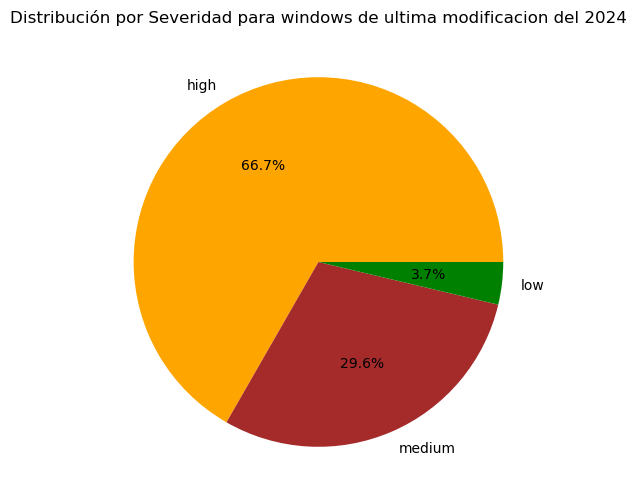

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
severity_counts = df["severity"].value_counts()
colors = {'low': 'green', 'medium': 'brown', 'high': 'orange', 'critical': 'red'}
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%',
        colors=[colors.get(s, 'gray') for s in severity_counts.index])
plt.title("Distribución por Severidad para windows de ultima modificacion del 2024")
plt.show()


## 2. Gráfico: Vulnerabilidades por años

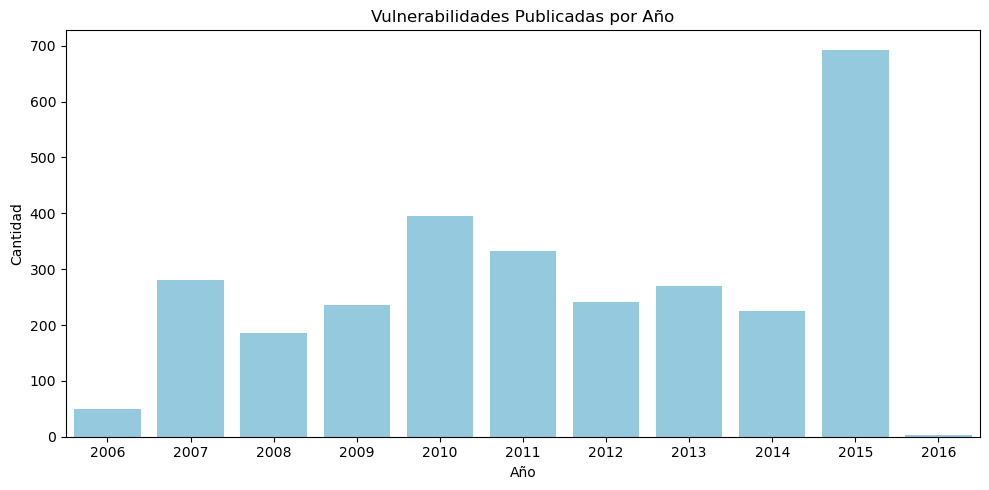

In [6]:
vulns_por_ano = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=vulns_por_ano.index, y=vulns_por_ano.values, color="skyblue")
plt.title("Vulnerabilidades Publicadas por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()


## 3.Gráfico: Vulnerabilidades por Año y Severidad (gráfico agrupado)

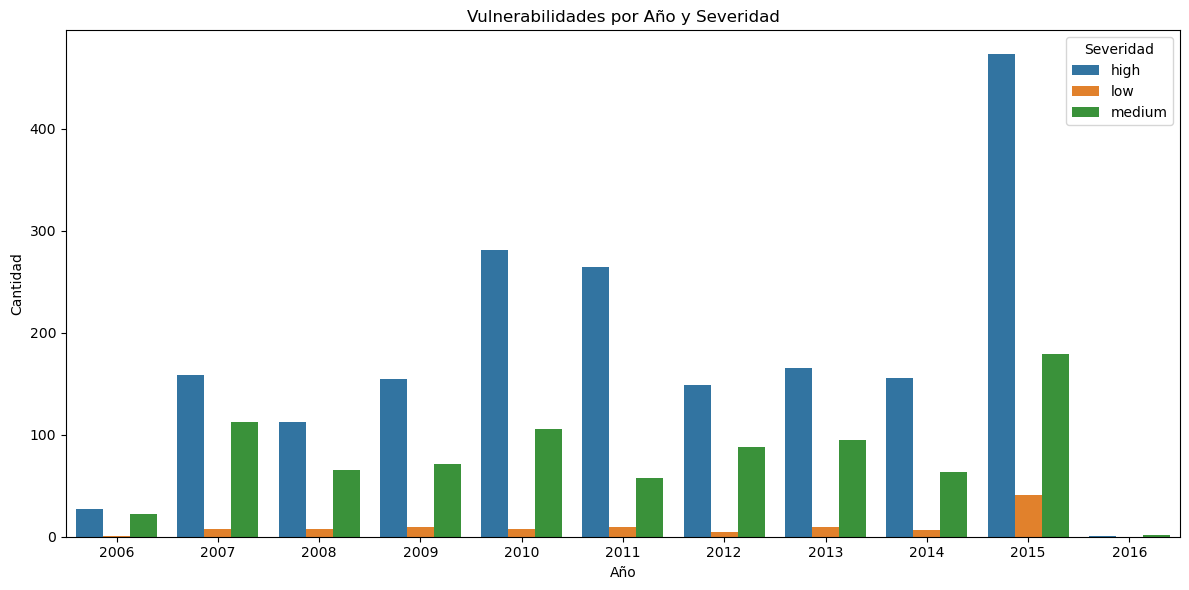

In [7]:
plt.figure(figsize=(12, 6))

# Agrupar por año y severidad
vulns_grouped = df.groupby(["year", "severity"]).size().reset_index(name="cantidad")

# Gráfico agrupado por 'year' y 'severity'
sns.barplot(data=vulns_grouped, x="year", y="cantidad", hue="severity")

plt.title("Vulnerabilidades por Año y Severidad")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.legend(title="Severidad")
plt.tight_layout()
plt.show()


## 4.Gráfico: CVSS Score promedio por año

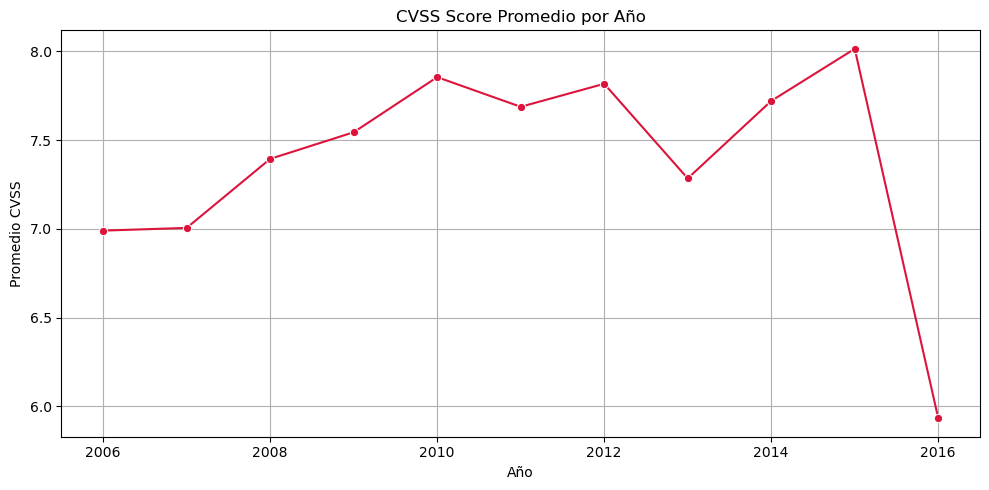

In [8]:
plt.figure(figsize=(10, 5))

# Agrupar y calcular el promedio de CVSS por año
cvss_por_ano = df.groupby("year")["cvss_score"].mean().dropna()

# Gráfico de línea
sns.lineplot(x=cvss_por_ano.index, y=cvss_por_ano.values, marker="o", color="crimson")

plt.title("CVSS Score Promedio por Año")
plt.xlabel("Año")
plt.ylabel("Promedio CVSS")
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretacion del grafo 4:
El hecho de que CVEs antiguas estén siendo modificadas en 2024 muestra la persistencia o revisión continua de riesgos pasados en sistemas Windows.

## 5.Gráfico: CVEs con impact_score == 10 agrupados por año y severidad

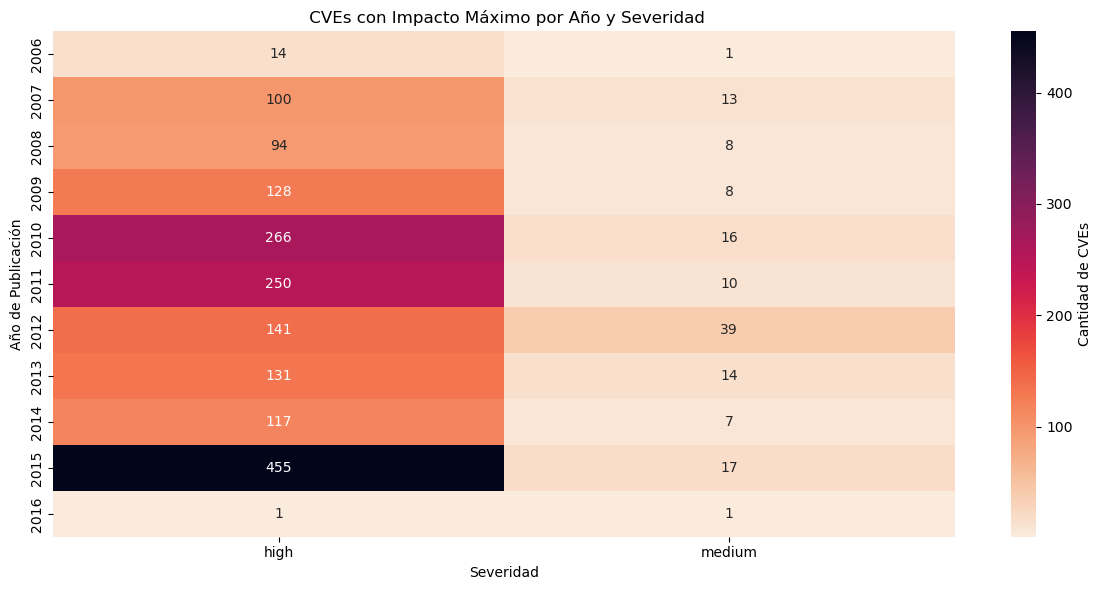

In [9]:
# Filtrar solo CVEs con impacto crítico
criticos = df[df["impact_score"] == 10]

# Crear tabla año (published) vs severidad
tabla_criticos = pd.crosstab(criticos["published"].dt.year, criticos["severity"])

# Mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(tabla_criticos, cmap="rocket_r", annot=True, fmt="d", cbar_kws={'label': 'Cantidad de CVEs'})

plt.title(" CVEs con Impacto Máximo por Año y Severidad")
plt.xlabel("Severidad")
plt.ylabel("Año de Publicación")
plt.tight_layout()
plt.show()
